<a href="https://colab.research.google.com/github/bettyIA86/Proyecto1/blob/main/CalidadModelo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("London_Air_Quality.csv")
#Filtrar el AQI por un día
fecha_inicio = '2024-06-01'
fecha_fin = '2024-06-30'
df_filtrado = df[(df['Date'] >= fecha_inicio) & (df['Date'] <= fecha_fin)].copy()


In [6]:
# Asegúrate de que 'Date' es de tipo datetime
df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'])

df_filtrado['Dia'] = df_filtrado['Date'].dt.day
df_filtrado['Mes'] = df_filtrado['Date'].dt.month

# Obtener los días distintos y almacenarlos en una lista
dias_distintos = df_filtrado['Date'].dt.day.unique().tolist()

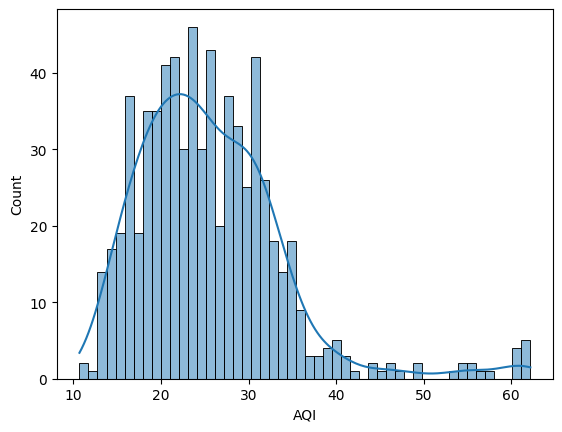

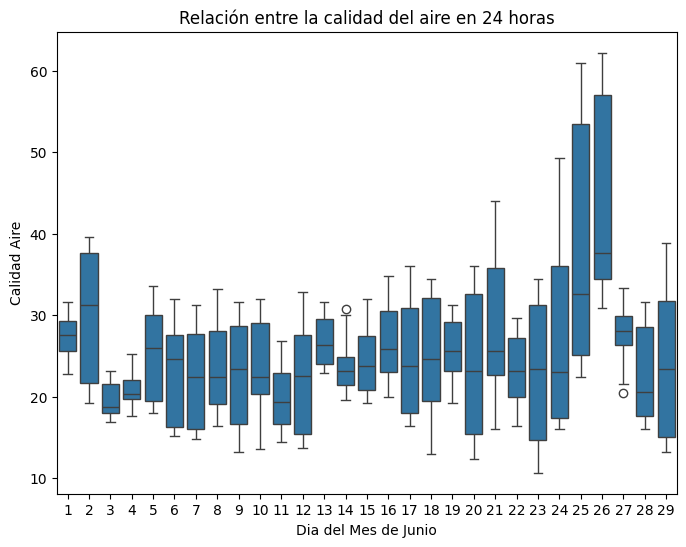

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de precios de las viviendas
sns.histplot(df_filtrado['AQI'], bins=50, kde=True)
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='Dia', y='AQI', data=df_filtrado)
plt.xlabel("Dia del Mes de Junio")
plt.ylabel("Calidad Aire")
plt.title("Relación entre la calidad del aire en 24 horas")
plt.show()

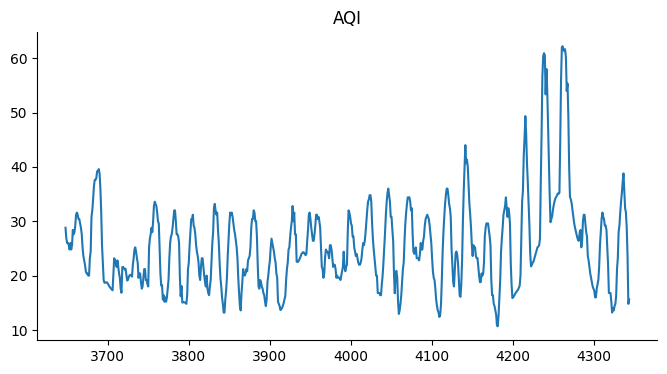

In [9]:
from matplotlib import pyplot as plt
df_filtrado['AQI'].plot(kind='line', figsize=(8, 4), title='AQI')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
#Entrenar el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Seleccionar características relevantes para la predicción
features = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5','PM10','AQI']
X = df_filtrado[features] # Variables independientes
y = df_filtrado['Dia']   # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear instancias de los modelos
lr = LinearRegression()  # Regresión Lineal
dt = DecisionTreeRegressor()  # Árbol de Decisión
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest

# Diccionario para almacenar los modelos
models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf
}

# Entrenar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo

results = {}
resul_pred = {}
# Evaluar cada modelo
for name, model in models.items():
    y_pred = model.predict(X_test)  # Hacer predicciones
    resul_pred[name] = (X_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
    r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación
    results[name] = (rmse, r2)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

Linear Regression: RMSE = 54.15, R² = 0.24
Decision Tree: RMSE = 54.96, R² = 0.23
Random Forest: RMSE = 29.50, R² = 0.59


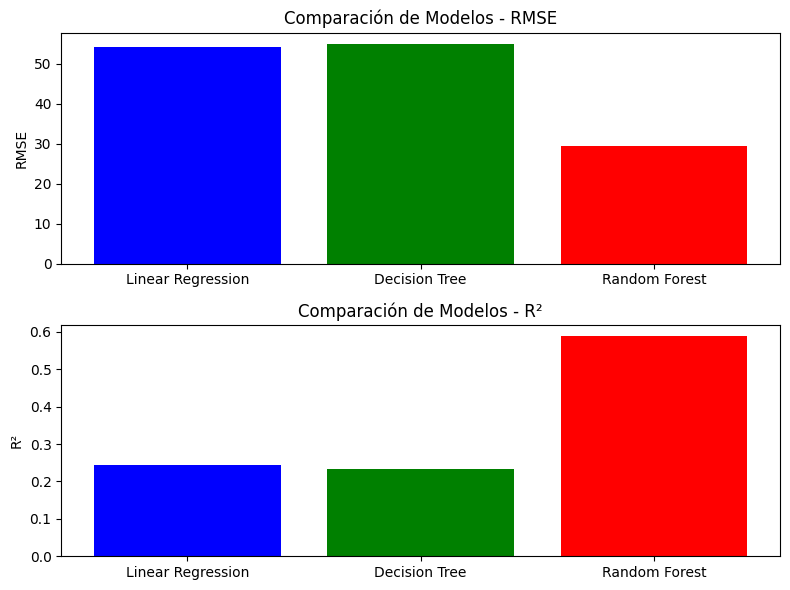

In [13]:
# Comparación visual de los modelos
plt.figure(figsize=(8, 6))
names = list(results.keys())
rmse_values = [results[name][0] for name in names]
r2_values = [results[name][1] for name in names]

# Gráfico de RMSE
plt.subplot(2, 1, 1)
plt.bar(names, rmse_values, color=['blue', 'green', 'red'])
plt.ylabel("RMSE")
plt.title("Comparación de Modelos - RMSE")

# Gráfico de R²
plt.subplot(2, 1, 2)
plt.bar(names, r2_values, color=['blue', 'green', 'red'])
plt.ylabel("R²")
plt.title("Comparación de Modelos - R²")

plt.tight_layout()
plt.show()

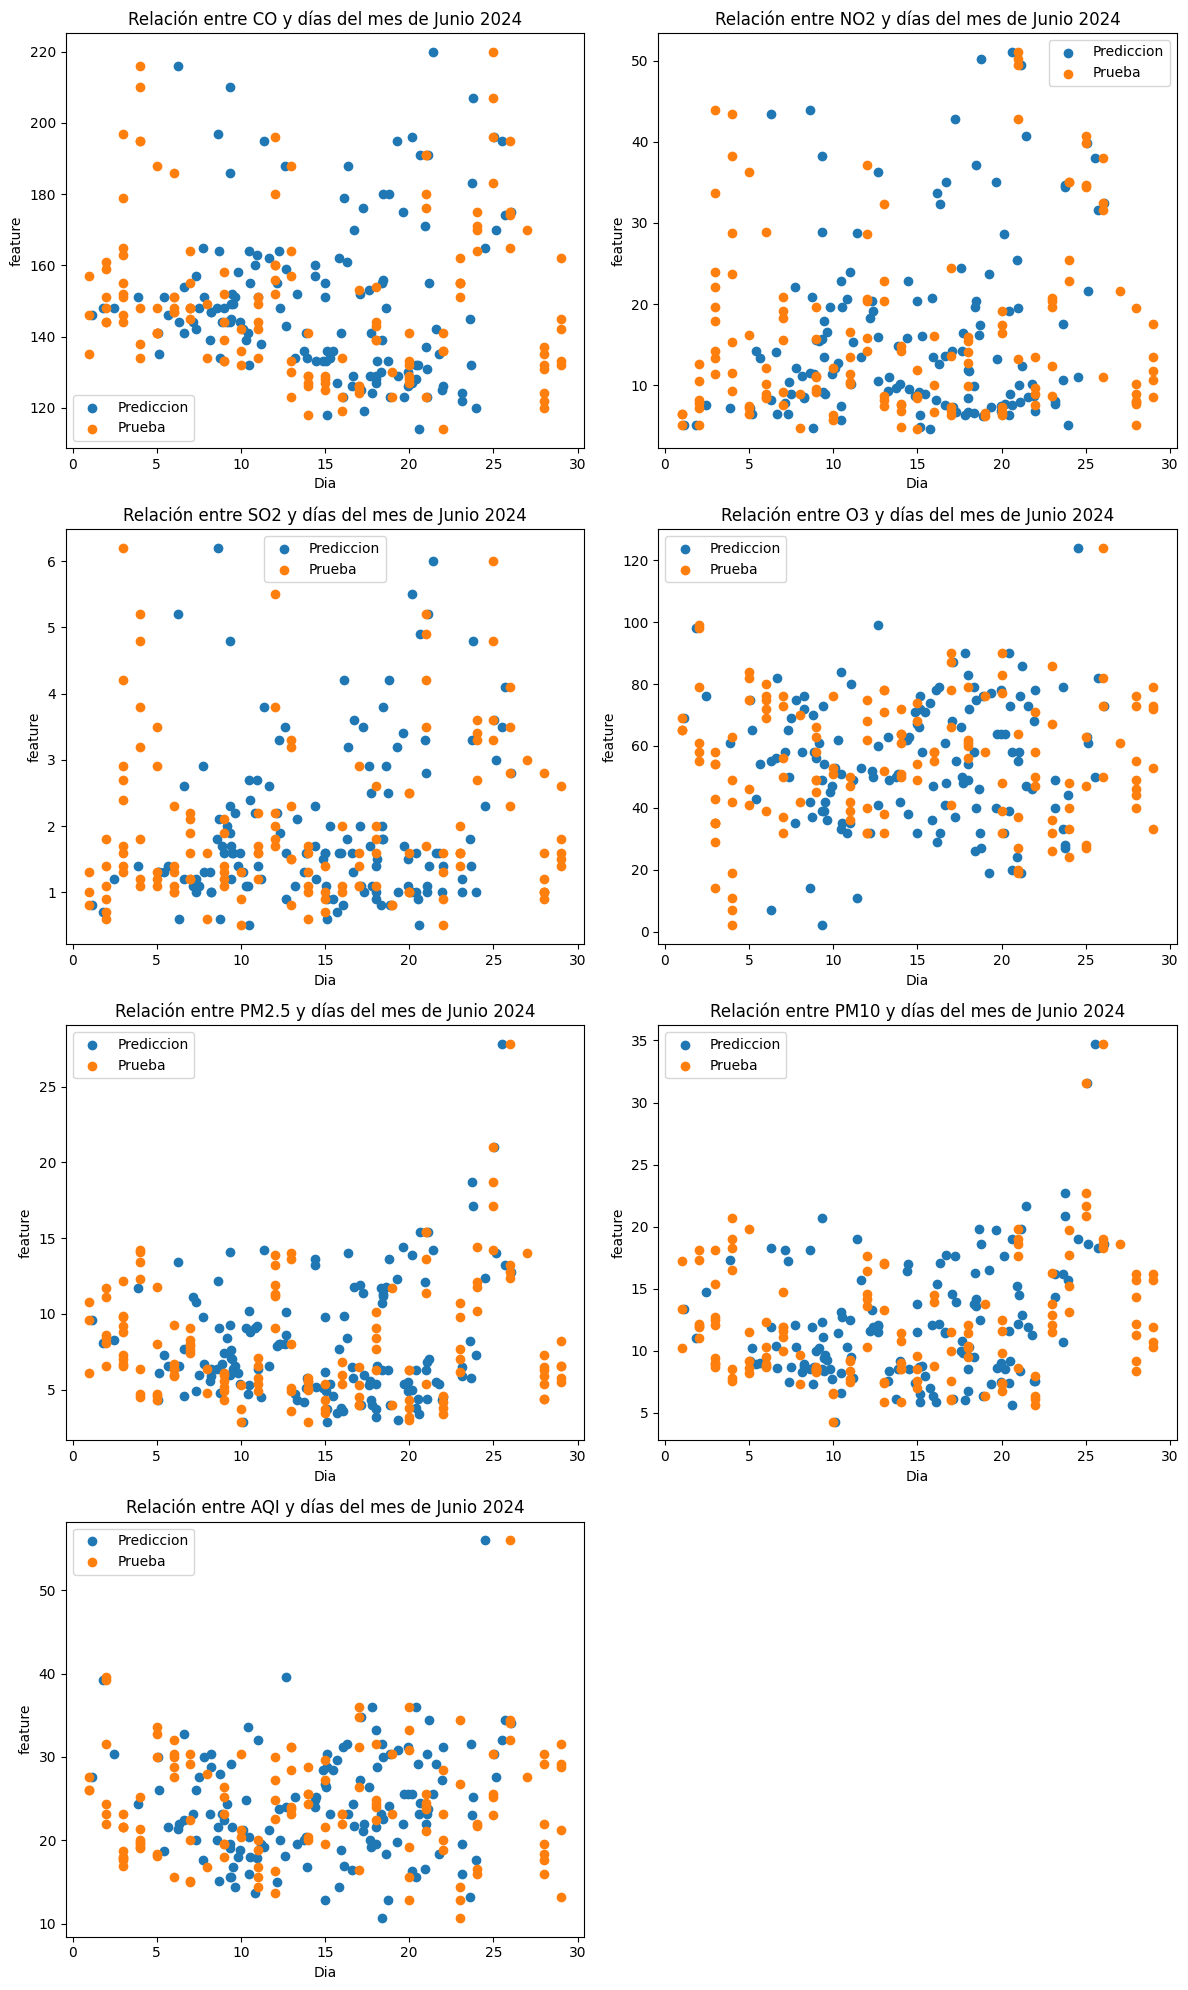

In [14]:
#Graficar Prediccion en Subplots
# Get the names of the features
features = X_test.columns
n_features = len(features)

# Calculate the number of rows and columns for the subplots
# You can adjust the layout as needed
n_cols = 2  # Number of columns
n_rows = (n_features + n_cols - 1) // n_cols # Calculate number of rows

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))

# Flatten the axes array if it's multi-dimensional for easy iteration
axes = axes.flatten()

# Loop through each feature and create a scatter plot in a subplot
for i, feature in enumerate(features):
    ax = axes[i] # Get the current axis
    ax.scatter(y_pred, X_test[feature], label="Prediccion")
    ax.scatter(y_test, X_test[feature], label="Prueba")
    ax.legend()
    ax.set_title(f"Relación entre {feature} y días del mes de Junio 2024")
    ax.set_xlabel('Dia')
    ax.set_ylabel("feature")

# Hide any unused subplots
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()